In [749]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

In [750]:
df=pd.read_csv("F:\Python Prac\ToyData.csv",usecols=["ORDERDATE",'QUANTITYORDERED',"SALES",\
                                                                       'PRODUCTLINE',"PRODUCTCODE","COUNTRY",\
                                                                       "STATE","CITY","POSTALCODE"],parse_dates=['ORDERDATE'])

In [751]:
#df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])

In [752]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERDATE        5 non-null      datetime64[ns]
 1   QUANTITYORDERED  5 non-null      int64         
 2   SALES            5 non-null      float64       
 3   PRODUCTLINE      5 non-null      object        
 4   PRODUCTCODE      5 non-null      object        
 5   COUNTRY          5 non-null      object        
 6   STATE            5 non-null      object        
 7   CITY             5 non-null      object        
 8   POSTALCODE       5 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 488.0+ bytes


In [753]:
df.set_index('ORDERDATE',inplace=True)

In [754]:
df

,QUANTITYORDERED,SALES,PRODUCTLINE,PRODUCTCODE,COUNTRY,STATE,CITY,POSTALCODE
ORDERDATE,,,,,,,,
2003-02-24,30,2871.00,Motorcycles,S10_1678,USA,NY,NYC,10022
2003-05-07,34,2765.90,Motorcycles,S10_1678,France,All,Reims,51100
2003-07-01,41,3884.34,Motorcycles,S10_1678,France,All,Paris,75508
2003-08-25,45,3746.70,Motorcycles,S10_1678,USA,CA,Pasadena,90003
2003-10-10,49,5205.27,Motorcycles,S10_1678,USA,CA,San Francisco,94105
...,...,...,...,...,...,...,...,...
2005-01-15,28,2444.40,Vintage Cars,S18_3320,Canada,BC,Vancouver,V3F 2K1
2005-01-15,26,1419.93,Vintage Cars,S18_4668,Canada,BC,Vancouver,V3F 2K1
2005-01-25,33,3213.87,Vintage Cars,S24_4258,Canada,Quebec,Montreal,V3F 2K1


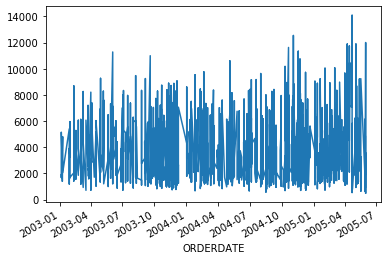

In [755]:
df['SALES'].plot()

In [756]:
df.reset_index(inplace=True)

In [757]:
df

,ORDERDATE,QUANTITYORDERED,SALES,PRODUCTLINE,PRODUCTCODE,COUNTRY,STATE,CITY,POSTALCODE
0,2003-02-24,30,2871.00,Motorcycles,S10_1678,USA,NY,NYC,10022
1,2003-05-07,34,2765.90,Motorcycles,S10_1678,France,All,Reims,51100
2,2003-07-01,41,3884.34,Motorcycles,S10_1678,France,All,Paris,75508
3,2003-08-25,45,3746.70,Motorcycles,S10_1678,USA,CA,Pasadena,90003
4,2003-10-10,49,5205.27,Motorcycles,S10_1678,USA,CA,San Francisco,94105
...,...,...,...,...,...,...,...,...,...
2854,2005-01-15,28,2444.40,Vintage Cars,S18_3320,Canada,BC,Vancouver,V3F 2K1
2855,2005-01-15,26,1419.93,Vintage Cars,S18_4668,Canada,BC,Vancouver,V3F 2K1
2856,2005-01-25,33,3213.87,Vintage Cars,S24_4258,Canada,Quebec,Montreal,V3F 2K1
2857,2005-01-25,36,2117.52,Trucks and Buses,S32_3522,Canada,BC,Vancouver,V3F 2K1


In [758]:
a=df.groupby(['ORDERDATE', 'COUNTRY', 'STATE', 'CITY', 'POSTALCODE', 'PRODUCTLINE', 'PRODUCTCODE']).agg({'SALES':'sum','QUANTITYORDERED':'mean'})

In [759]:
a

SALES  \
ORDERDATE  COUNTRY STATE CITY      POSTALCODE PRODUCTLINE      PRODUCTCODE            
2003-01-06 USA     NH    Nashua    62005      Vintage Cars     S18_1749     5151.00   
                                                               S18_2248     3390.00   
                                                               S18_4409     1903.22   
                                                               S24_3969     1689.03   
2003-01-09 Germany All   Frankfurt 60528      Vintage Cars     S18_2325     3782.00   
...                                                                             ...   
2005-05-31 Spain   All   Madrid    28034      Classic Cars     S700_2824    3722.32   
                                              Trucks and Buses S12_1666     7969.36   
                                                               S18_1097     7182.00   
                                                               S32_3522     2702.04   
                                              Vintage Cars     S18_4668     1556.62   

                                                                            QUANTITYORDERED  
ORDERDATE  COUNTRY STATE CITY      POSTALCODE PRODUCTLINE      PRODUCTCODE                   
2003-01-06 USA     NH    Nashua    62005      Vintage Cars     S18_1749                  30  
                                                               S18_2248                  50  
                                                               S18_4409                  22  
                                                               S24_3969                  49  
2003-01-09 Germany All   Frankfurt 60528      Vintage Cars     S18_2325                  25  
...                                                                                     ...  
2005-05-31 Spain   All   Madrid    28034      Classic Cars     S700_2824                 46  
                                              Trucks and Buses S12_1666                  49  
                                                               S18_1097                  54  
                                                               S32_3522                  44  
                                              Vintage Cars     S18_4668                  26  

[2859 rows x 2 columns]

In [760]:
a.index

MultiIndex([('2003-01-06',     'USA',  'NH',    'Nashua', '62005', ...),
            ('2003-01-06',     'USA',  'NH',    'Nashua', '62005', ...),
            ('2003-01-06',     'USA',  'NH',    'Nashua', '62005', ...),
            ('2003-01-06',     'USA',  'NH',    'Nashua', '62005', ...),
            ('2003-01-09', 'Germany', 'All', 'Frankfurt', '60528', ...),
            ('2003-01-09', 'Germany', 'All', 'Frankfurt', '60528', ...),
            ('2003-01-09', 'Germany', 'All', 'Frankfurt', '60528', ...),
            ('2003-01-09', 'Germany', 'All', 'Frankfurt', '60528', ...),
            ('2003-01-10',     'USA',  'NY',       'NYC', '10022', ...),
            ('2003-01-10',     'USA',  'NY',       'NYC', '10022', ...),
            ...
            ('2005-05-31',  'France', 'All',    'Nantes', '44000', ...),
            ('2005-05-31',  'France', 'All',    'Nantes', '44000', ...),
            ('2005-05-31',  'France', 'All',    'Nantes', '44000', ...),
            ('2005-05-31',  'France

In [761]:
a.columns

Index(['SALES', 'QUANTITYORDERED'], dtype='object')

In [762]:
a.reset_index(inplace=True)

In [763]:
a.head()

,ORDERDATE,COUNTRY,STATE,CITY,POSTALCODE,PRODUCTLINE,PRODUCTCODE,SALES,QUANTITYORDERED
0,2003-01-06,USA,NH,Nashua,62005,Vintage Cars,S18_1749,5151.00,30
1,2003-01-06,USA,NH,Nashua,62005,Vintage Cars,S18_2248,3390.00,50
2,2003-01-06,USA,NH,Nashua,62005,Vintage Cars,S18_4409,1903.22,22
3,2003-01-06,USA,NH,Nashua,62005,Vintage Cars,S24_3969,1689.03,49
4,2003-01-09,Germany,All,Frankfurt,60528,Vintage Cars,S18_2325,3782.00,25


In [764]:
d=datetime.datetime.now()
d

datetime.datetime(2020, 2, 26, 17, 33, 15, 827751)

In [765]:
datetime.date(d.year,d.month,1)

datetime.date(2020, 2, 1)

In [766]:
def monthBeginDate(row):
    return datetime.date(row['ORDERDATE'].year,row['ORDERDATE'].month,1)

In [767]:
a['monthBeginDate']=a.apply(monthBeginDate,axis=1)

In [768]:
a.head()

,ORDERDATE,COUNTRY,STATE,CITY,POSTALCODE,PRODUCTLINE,PRODUCTCODE,SALES,QUANTITYORDERED,monthBeginDate
0,2003-01-06,USA,NH,Nashua,62005,Vintage Cars,S18_1749,5151.00,30,2003-01-01
1,2003-01-06,USA,NH,Nashua,62005,Vintage Cars,S18_2248,3390.00,50,2003-01-01
2,2003-01-06,USA,NH,Nashua,62005,Vintage Cars,S18_4409,1903.22,22,2003-01-01
3,2003-01-06,USA,NH,Nashua,62005,Vintage Cars,S24_3969,1689.03,49,2003-01-01
4,2003-01-09,Germany,All,Frankfurt,60528,Vintage Cars,S18_2325,3782.00,25,2003-01-01


In [769]:
monthDate=a.groupby(['monthBeginDate', 'COUNTRY', 'STATE', 'CITY', 'POSTALCODE', 'PRODUCTLINE', 'PRODUCTCODE']).agg({'SALES':'sum','QUANTITYORDERED':'mean'})

In [770]:
monthDate.head()

SALES  \
monthBeginDate COUNTRY STATE CITY      POSTALCODE PRODUCTLINE  PRODUCTCODE            
2003-01-01     Germany All   Frankfurt 60528      Vintage Cars S18_2325     3782.00   
                                                               S18_2795     3773.38   
                                                               S24_1937     1404.00   
                                                               S24_2022     2472.96   
               Norway  All   Stavern   4110       Classic Cars S10_1949     5404.62   

                                                                            QUANTITYORDERED  
monthBeginDate COUNTRY STATE CITY      POSTALCODE PRODUCTLINE  PRODUCTCODE                   
2003-01-01     Germany All   Frankfurt 60528      Vintage Cars S18_2325                25.0  
                                                               S18_2795                26.0  
                                                               S24_1937                45.0  
                                                               S24_2022                46.0  
               Norway  All   Stavern   4110       Classic Cars S10_1949                26.0

In [771]:
monthDate.reset_index(inplace=True)

In [772]:
monthDate=monthDate.rename(columns={'monthBeginDate':'ORDERDATE'})

In [773]:
monthDate

,ORDERDATE,COUNTRY,STATE,CITY,POSTALCODE,PRODUCTLINE,PRODUCTCODE,SALES,QUANTITYORDERED
0,2003-01-01,Germany,All,Frankfurt,60528,Vintage Cars,S18_2325,3782.00,25.0
1,2003-01-01,Germany,All,Frankfurt,60528,Vintage Cars,S18_2795,3773.38,26.0
2,2003-01-01,Germany,All,Frankfurt,60528,Vintage Cars,S24_1937,1404.00,45.0
3,2003-01-01,Germany,All,Frankfurt,60528,Vintage Cars,S24_2022,2472.96,46.0
4,2003-01-01,Norway,All,Stavern,4110,Classic Cars,S10_1949,5404.62,26.0
...,...,...,...,...,...,...,...,...,...
2851,2005-05-01,USA,MA,Boston,51003,Vintage Cars,S18_4522,1207.68,16.0
2852,2005-05-01,USA,MA,Boston,51003,Vintage Cars,S24_3151,6107.40,60.0
2853,2005-05-01,USA,MA,Boston,51003,Vintage Cars,S24_3816,3891.81,51.0
2854,2005-05-01,USA,PA,Allentown,70267,Vintage Cars,S18_1342,4873.05,51.0


In [774]:
m=monthDate.groupby(['ORDERDATE','COUNTRY']).agg({'SALES':'sum','QUANTITYORDERED':'mean'})

In [775]:
m.shape

(184, 2)

In [776]:
m.reset_index(inplace=True)

In [777]:
m

,ORDERDATE,COUNTRY,SALES,QUANTITYORDERED
0,2003-01-01,Germany,11432.34,35.500000
1,2003-01-01,Norway,54702.00,33.812500
2,2003-01-01,Spain,44621.96,34.076923
3,2003-01-01,USA,18997.30,38.500000
4,2003-02-01,Denmark,58871.11,36.333333
...,...,...,...,...
179,2005-05-01,Canada,33692.97,31.666667
180,2005-05-01,France,43784.69,32.846154
181,2005-05-01,Italy,41509.94,32.857143
182,2005-05-01,Spain,119242.98,42.739130


In [778]:
maxDate=m.ORDERDATE.max()

In [779]:
preDate=maxDate-relativedelta(months=1)

In [780]:
maxDate

datetime.date(2005, 5, 1)

In [781]:
preDate

datetime.date(2005, 4, 1)

In [782]:
m.columns

Index(['ORDERDATE', 'COUNTRY', 'SALES', 'QUANTITYORDERED'], dtype='object')

In [783]:
#m['ORDERDATE']=pd.to_datetime(m['ORDERDATE'])

In [784]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERDATE        184 non-null    object 
 1   COUNTRY          184 non-null    object 
 2   SALES            184 non-null    float64
 3   QUANTITYORDERED  184 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


In [785]:
maxMonth = m[m['ORDERDATE'] == maxDate]

In [786]:
preMonth = m[m['ORDERDATE'] == preDate]

In [787]:
maxMonth

,ORDERDATE,COUNTRY,SALES,QUANTITYORDERED
176,2005-05-01,Australia,58349.52,38.666667
177,2005-05-01,Austria,59475.10,36.357143
178,2005-05-01,Belgium,8411.95,22.200000
179,2005-05-01,Canada,33692.97,31.666667
180,2005-05-01,France,43784.69,32.846154
181,2005-05-01,Italy,41509.94,32.857143
182,2005-05-01,Spain,119242.98,42.739130
183,2005-05-01,USA,93393.91,36.916667


In [788]:
preMonth

,ORDERDATE,COUNTRY,SALES,QUANTITYORDERED
170,2005-04-01,Denmark,26012.87,58.000000
171,2005-04-01,France,49747.15,61.875000
172,2005-04-01,Japan,553.95,15.000000
173,2005-04-01,Singapore,2587.58,33.500000
174,2005-04-01,UK,40802.81,41.222222
175,2005-04-01,USA,141928.93,45.818182


In [789]:
combined=pd.merge(preMonth,maxMonth,how='outer',on=['COUNTRY'])[['COUNTRY', 'SALES_x', 'SALES_y']].fillna(0)

In [790]:
combined

,COUNTRY,SALES_x,SALES_y
0,Denmark,26012.87,0.00
1,France,49747.15,43784.69
2,Japan,553.95,0.00
3,Singapore,2587.58,0.00
4,UK,40802.81,0.00
5,USA,141928.93,93393.91
6,Australia,0.00,58349.52
7,Austria,0.00,59475.10
8,Belgium,0.00,8411.95
9,Canada,0.00,33692.97


In [791]:
combined['increased']=combined['SALES_y']-combined['SALES_x']

In [792]:
combined

,COUNTRY,SALES_x,SALES_y,increased
0,Denmark,26012.87,0.00,-26012.87
1,France,49747.15,43784.69,-5962.46
2,Japan,553.95,0.00,-553.95
3,Singapore,2587.58,0.00,-2587.58
4,UK,40802.81,0.00,-40802.81
5,USA,141928.93,93393.91,-48535.02
6,Australia,0.00,58349.52,58349.52
7,Austria,0.00,59475.10,59475.10
8,Belgium,0.00,8411.95,8411.95
9,Canada,0.00,33692.97,33692.97


In [793]:
combined.columns=['COUNTRY','prevMonth_Sales','maxMonth_Sales','Increased']

In [794]:
combined=combined.rename(columns={'maxMonth_Sales':'presentMonth_sales'})

In [795]:
p=combined['Increased']/combined['Increased'].sum()*100

In [796]:
p

0    -13.256467
1     -3.038540
2     -0.282299
3     -1.318661
4    -20.793596
5    -24.734022
6     29.735608
7     30.309217
8      4.286830
9     17.170337
10    21.153958
11    60.767638
Name: Increased, dtype: float64